# Program Vectors 

## 1) Programs as word vectors

First, we are going to treat the programs students write and submit to our platform as word vectors:

In [1]:
import re
def remove_comments(text):
    return re.sub(re.compile('#.*?\n'), '', text)

In [2]:
program = '#!/usr/bin/env python\n\na = int(raw_input())\nb = int(raw_input())\n\nprint a + b\n\n\n'
remove_comments(program)

'\na = int(raw_input())\nb = int(raw_input())\n\nprint a + b\n\n\n'

In [3]:
program = '''
#!/usr/bin/env python
# read from input
a = int(raw_input()) # first
b = int(raw_input()) # second
print a + b
'''
remove_comments(program)

'\na = int(raw_input()) b = int(raw_input()) print a + b\n'

**Keras**

Keras provides a more sophisticated API for preparing text that can be fit and reused to prepare multiple text documents. This may be the preferred approach for large projects.

Keras provides the Tokenizer class for preparing text documents for deep learning. The Tokenizer must be constructed and then fit on either raw text documents or integer encoded text documents.

https://machinelearningmastery.com/prepare-text-data-deep-learning-keras/

In [4]:
from keras.preprocessing.text import text_to_word_sequence

# text_to_word_sequence?

Using TensorFlow backend.


In [5]:
text_to_word_sequence(remove_comments(program), lower=True, split=' ')

['a', 'int', 'raw', 'input', 'b', 'int', 'raw', 'input', 'print', 'a', 'b']

By default in text_to_word_sequence the filters are:

> filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'

See the function signature

In [6]:
text_to_word_sequence(remove_comments(program), 
                      filters='\t\n',
                      lower=True, 
                      split=' ')

['a',
 '=',
 'int(raw_input())',
 'b',
 '=',
 'int(raw_input())',
 'print',
 'a',
 '+',
 'b']

In [7]:
# https://keras.io/preprocessing/text/#tokenizer
from keras.preprocessing.text import Tokenizer

# Tokenizer?

In [8]:
t = Tokenizer(num_words=None, 
              filters='\t\n', 
              lower=True, 
              split=' ', 
              char_level=False)

In [9]:
docs = [
    remove_comments(program),
]

In [10]:
t.fit_on_texts(docs)

Once fit, the Tokenizer provides 4 attributes that you can use to query what has been learned about your documents:

- word_counts: A dictionary of words and their counts.
- word_docs: A dictionary of words and how many documents each appeared in.
- word_index: A dictionary of words and their uniquely assigned integers.
- document_count: An integer count of the total number of documents that were used to fit the Tokenizer.

In [11]:
t.word_counts

OrderedDict([('a', 2),
             ('=', 2),
             ('int(raw_input())', 2),
             ('b', 2),
             ('print', 1),
             ('+', 1)])

In [12]:
print ('Number docs', t.document_count)

('Number docs', 1)


In [13]:
t.word_index

{'+': 6, '=': 2, 'a': 1, 'b': 4, 'int(raw_input())': 3, 'print': 5}

In [14]:
t.word_docs

{'+': 1, '=': 1, 'a': 1, 'b': 1, 'int(raw_input())': 1, 'print': 1}

In [15]:
# integer encode documents
encoded_docs = t.texts_to_matrix(docs, mode='count')

In [16]:
t.texts_to_matrix?

In [17]:
encoded_docs

array([[ 0.,  2.,  2.,  2.,  2.,  1.,  1.]])

It still does not represent a programming submission in a very comparable way to other submissions that have different variable names and so on

## 2) Programs as Python tokens

* https://docs.python.org/3/library/tokenize.html
* https://docs.python.org/3/library/token.html
* Code: https://github.com/python/cpython/blob/3.7/Lib/tokenize.py
* Code: https://github.com/python/cpython/blob/3.7/Lib/token.py
* C code: https://github.com/python/cpython/blob/master/Parser/tokenizer.c
* C library: https://github.com/python/cpython/blob/master/Include/token.h

Intead of words, we are going to convert code to tokens:

In [18]:
import sys
from tokenize import generate_tokens
from StringIO import StringIO

In [19]:
from tokenize import LPAR, OP, Funny, AMPER, AMPEREQUAL, any, AT, Comment, COMMENT

print LPAR 
print OP
print AT
print Funny
print COMMENT
print Comment

7
51
50
((\*\*=?|>>=?|<<=?|<>|!=|//=?|[+\-*/%&|^=<>]=?|~)|[][(){}]|(\r?\n|[:;.,`@]))
53
#[^\r\n]*


**Command line**

In [20]:
!cat data/examples/hello.py

def say_hello():
    print("Hello, World!")

say_hello()


In [21]:
!python -m tokenize data/examples/hello.py

1,0-1,3:	NAME	'def'
1,4-1,13:	NAME	'say_hello'
1,13-1,14:	OP	'('
1,14-1,15:	OP	')'
1,15-1,16:	OP	':'
1,16-1,17:	NEWLINE	'\n'
2,0-2,4:	INDENT	'    '
2,4-2,9:	NAME	'print'
2,9-2,10:	OP	'('
2,10-2,25:	STRING	'"Hello, World!"'
2,25-2,26:	OP	')'
2,26-2,27:	NEWLINE	'\n'
3,0-3,1:	NL	'\n'
4,0-4,0:	DEDENT	''
4,0-4,9:	NAME	'say_hello'
4,9-4,10:	OP	'('
4,10-4,11:	OP	')'
4,11-4,12:	NEWLINE	'\n'
5,0-5,0:	ENDMARKER	''


**Programatically**

In [22]:
# generate_tokens?

In [23]:
program_code = '''def say_hello():
    print("Hello, World!")

say_hello()'''

In [24]:
tokens = list(generate_tokens(StringIO(program_code).readline))

In [25]:
def print_tokens(tokens):
    for t in tokens:
        print (str(t[0]) + "," + str(t[2][1]) + "-" + str(t[2][0]) + ',' + str(t[3][1]) + ':\t' + 
               str(t[0]) + '\t' + # id_to_token[t[0]]
               repr(str(t[1])))

In [26]:
print_tokens(tokens)

1,0-1,3:	1	'def'
1,4-1,13:	1	'say_hello'
51,13-1,14:	51	'('
51,14-1,15:	51	')'
51,15-1,16:	51	':'
4,16-1,17:	4	'\n'
5,0-2,4:	5	'    '
1,4-2,9:	1	'print'
51,9-2,10:	51	'('
3,10-2,25:	3	'"Hello, World!"'
51,25-2,26:	51	')'
4,26-2,27:	4	'\n'
54,0-3,1:	54	'\n'
6,0-4,0:	6	''
1,0-4,9:	1	'say_hello'
51,9-4,10:	51	'('
51,10-4,11:	51	')'
0,0-5,0:	0	''


In [27]:
# List of:
# Token code, Part of the line being analysed, FROM (line, character), TO (line, character), Complete line of code
tokens

[(1, 'def', (1, 0), (1, 3), 'def say_hello():\n'),
 (1, 'say_hello', (1, 4), (1, 13), 'def say_hello():\n'),
 (51, '(', (1, 13), (1, 14), 'def say_hello():\n'),
 (51, ')', (1, 14), (1, 15), 'def say_hello():\n'),
 (51, ':', (1, 15), (1, 16), 'def say_hello():\n'),
 (4, '\n', (1, 16), (1, 17), 'def say_hello():\n'),
 (5, '    ', (2, 0), (2, 4), '    print("Hello, World!")\n'),
 (1, 'print', (2, 4), (2, 9), '    print("Hello, World!")\n'),
 (51, '(', (2, 9), (2, 10), '    print("Hello, World!")\n'),
 (3, '"Hello, World!"', (2, 10), (2, 25), '    print("Hello, World!")\n'),
 (51, ')', (2, 25), (2, 26), '    print("Hello, World!")\n'),
 (4, '\n', (2, 26), (2, 27), '    print("Hello, World!")\n'),
 (54, '\n', (3, 0), (3, 1), '\n'),
 (6, '', (4, 0), (4, 0), 'say_hello()'),
 (1, 'say_hello', (4, 0), (4, 9), 'say_hello()'),
 (51, '(', (4, 9), (4, 10), 'say_hello()'),
 (51, ')', (4, 10), (4, 11), 'say_hello()'),
 (0, '', (5, 0), (5, 0), '')]

This is a more interesting representation that abstracts away the variables names, types of operators, etc but it may be too general to see the differences in between the students' submissions

## 3) Programs as Abstract Syntax Trees

https://docs.python.org/3/library/ast.html

In [28]:
import ast

In [29]:
program_code

'def say_hello():\n    print("Hello, World!")\n\nsay_hello()'

In [30]:
program_ast = ast.parse(program_code)

In [31]:
program_ast

In [32]:
ast.dump(program_ast)

"Module(body=[FunctionDef(name='say_hello', args=arguments(args=[], vararg=None, kwarg=None, defaults=[]), body=[Print(dest=None, values=[Str(s='Hello, World!')], nl=True)], decorator_list=[]), Expr(value=Call(func=Name(id='say_hello', ctx=Load()), args=[], keywords=[], starargs=None, kwargs=None))])"

In [33]:
program_ast.body

[<_ast.FunctionDef at 0x18196e1a10>, <_ast.Expr at 0x18196e1d90>]

In [34]:
for statement in program_ast.body:
    print ast.dump(statement), '\n'

FunctionDef(name='say_hello', args=arguments(args=[], vararg=None, kwarg=None, defaults=[]), body=[Print(dest=None, values=[Str(s='Hello, World!')], nl=True)], decorator_list=[]) 

Expr(value=Call(func=Name(id='say_hello', ctx=Load()), args=[], keywords=[], starargs=None, kwargs=None)) 



In [35]:
class FunctionCallVisitor(ast.NodeVisitor):
    def visit_Call(self, node):
        print ast.dump(node)

FunctionCallVisitor().visit(program_ast)

Call(func=Name(id='say_hello', ctx=Load()), args=[], keywords=[], starargs=None, kwargs=None)


In [36]:
divisors_code = '''def divisors(n):
    for d in range(1, n + 1):
        if n % d == 0:
            print d'''

In [37]:
ast.dump(ast.parse(divisors_code))

"Module(body=[FunctionDef(name='divisors', args=arguments(args=[Name(id='n', ctx=Param())], vararg=None, kwarg=None, defaults=[]), body=[For(target=Name(id='d', ctx=Store()), iter=Call(func=Name(id='range', ctx=Load()), args=[Num(n=1), BinOp(left=Name(id='n', ctx=Load()), op=Add(), right=Num(n=1))], keywords=[], starargs=None, kwargs=None), body=[If(test=Compare(left=BinOp(left=Name(id='n', ctx=Load()), op=Mod(), right=Name(id='d', ctx=Load())), ops=[Eq()], comparators=[Num(n=0)]), body=[Print(dest=None, values=[Name(id='d', ctx=Load())], nl=True)], orelse=[])], orelse=[])], decorator_list=[])])"

### Visualize the tree

https://github.com/hchasestevens/show_ast

In [38]:
import graphviz
import itertools
from functools import partial
from IPython.display import SVG

_basestring = basestring

In [39]:
def recurse_through_ast(node, handle_ast, handle_terminal, handle_fields, handle_no_fields, omit_docstrings):
    possible_docstring = isinstance(node, (ast.FunctionDef, ast.ClassDef, ast.Module))
    
    node_fields = zip(
        node._fields,
        (getattr(node, attr) for attr in node._fields)
    )
    field_results = []
    for field_name, field_value in node_fields:
        if isinstance(field_value, ast.AST):
            field_results.append(handle_ast(field_value))
        
        elif isinstance(field_value, list):
            if possible_docstring and omit_docstrings and field_name == 'body':
                field_value = _strip_docstring(field_value)
            field_results.extend(
                handle_ast(item)
                if isinstance(item, ast.AST) else
                handle_terminal(item)
                for item in field_value
            )
        
        elif isinstance(field_value, _basestring):
            field_results.append(handle_terminal('"{}"'.format(field_value)))
            
        elif field_value is not None:
            field_results.append(handle_terminal(field_value))

    if not field_results:
        return handle_no_fields(node)

    return handle_fields(node, field_results)

In [40]:
my_settings = dict(
    # Styling options:
    scale=2,
    font='courier',
    shape='none',
    terminal_color='#008040',
    nonterminal_color='#004080',
    # AST display options:
    omit_module=True,
    omit_docstrings=True,
)

In [41]:
def _strip_docstring(body):
    first = body[0]
    if isinstance(first, ast.Expr) and isinstance(first.value, ast.Str):
        return body[1:]
    return body

In [42]:
code = '''
def hello():
    """Return Hi."""
    return 'Hi!'
'''

_strip_docstring(ast.dump(ast.parse(code)))

"Module(body=[FunctionDef(name='hello', args=arguments(args=[], vararg=None, kwarg=None, defaults=[]), body=[Expr(value=Str(s='Return Hi.')), Return(value=Str(s='Hi!'))], decorator_list=[])])"

In [43]:
def _bold(label):
    return '<<B>{}</B>>'.format(label)


def _attach_to_parent(parent, graph, names, label, name=None, **style):
    node_name = next(names) if name is None else name
    node = graph.node(node_name, label=label, **style)
    if parent is not None:
        graph.edge(parent, node_name, sametail='t{}'.format(parent))


def handle_ast(node, parent_node, graph, names, omit_docstrings, terminal_color, nonterminal_color):
    attach_to_parent = partial(
        _attach_to_parent,
        graph=graph,
        names=names,
    )
    node_name = next(names)
    attach_to_parent(
        parent=parent_node,
        label=_bold(node.__class__.__name__),
        name=node_name,
        fontcolor=nonterminal_color,
    )
    recurse_through_ast(
        node, 
        partial(
            handle_ast, 
            parent_node=node_name,
            graph=graph,
            names=names,
            omit_docstrings=omit_docstrings, 
            terminal_color=terminal_color, 
            nonterminal_color=nonterminal_color,
        ), 
        partial(
            handle_terminal, 
            attach_to_parent=partial(
                attach_to_parent, 
                parent=node_name, 
                fontcolor=terminal_color,
            ),
        ), 
        handle_fields, 
        partial(
            handle_no_fields,
            parent_node=node_name,
            graph=graph,
            terminal_color=terminal_color,
            nonterminal_color=nonterminal_color,
        ),
        omit_docstrings,
    )


def handle_terminal(terminal, attach_to_parent):
    attach_to_parent(label=str(terminal))


def handle_fields(*__):
    pass


def handle_no_fields(__, parent_node, graph, terminal_color, nonterminal_color):
    parent_node_beginning = '{} '.format(parent_node)
    parent_node_num = int(parent_node)
    for i, node in enumerate(graph.body[parent_node_num:]):
        if node.strip().startswith(parent_node_beginning):
            break
    else:
        raise KeyError("Could not find parent in graph.")
    replacements = {
        nonterminal_color: terminal_color,
        '<<B>': '',
        '</B>>': '',
    }
    graph.body[i + parent_node_num] = reduce(
        lambda s, replacement: s.replace(*replacement),
        replacements.items(),
        node,
    )

In [384]:
def render(node, settings):
    """
    Given an AST node and settings, return a displayable object.
    """
    graph = graphviz.Graph(format='svg')
    names = (str(x) for x in itertools.count())

    handle_ast(
        node,
        parent_node=None,
        graph=graph,
        names=names,
        omit_docstrings=settings['omit_docstrings'],
        terminal_color=settings['terminal_color'],
        nonterminal_color=settings['nonterminal_color'],
    )

    graph.node_attr.update(dict(
        fontname=settings['font'],
        shape=settings['shape'],
    ))

    return SVG(graph.pipe(format='svg'))

In [385]:
def viz_code(code):
    return render(ast.parse(code), my_settings)

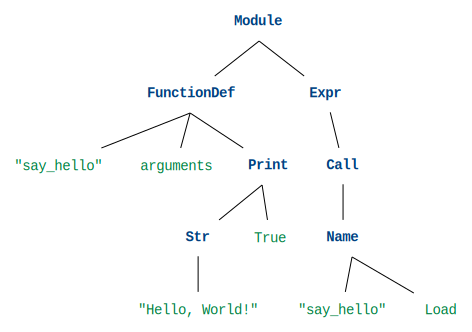

In [386]:
viz_code(program_code)

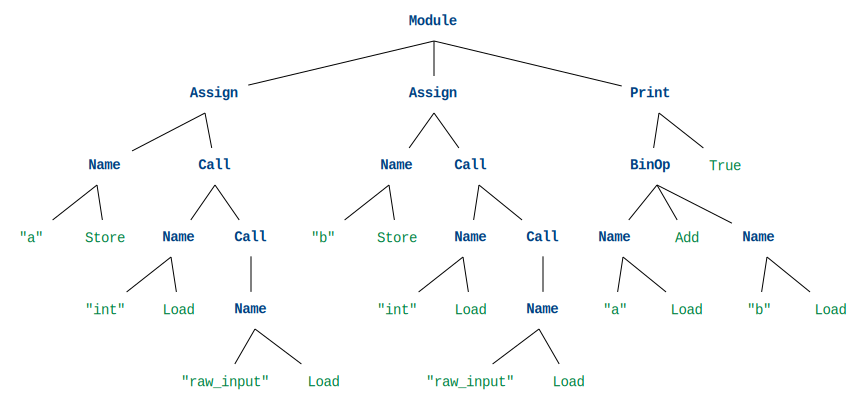

In [64]:
viz_code(program)

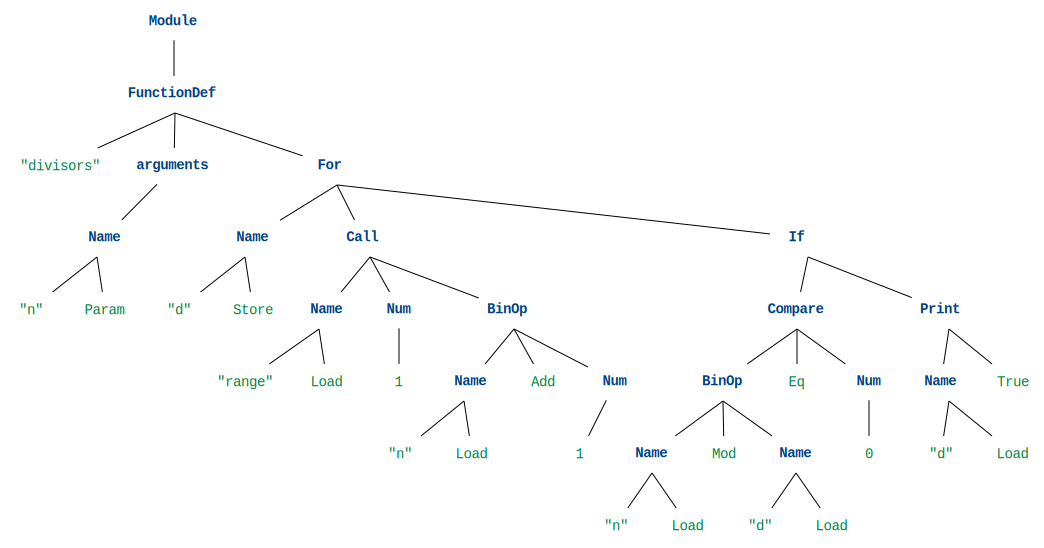

In [65]:
viz_code(divisors_code)

Extract a representation of the AST:

In [377]:
def get_ast_rep(node, name, parent_name, parent_type, parents=[]):
    
    try:
    
        node_name = node.__class__.__name__
        parents.append(node_name)
    
        for field_name, field_value in zip(node._fields, (getattr(node, attr) for attr in node._fields)):
            
            if isinstance(field_value, ast.AST):
                # print node_name, 
                get_ast_rep(field_value, field_name, node_name, 'AST', parents)

            elif isinstance(field_value, list):
                if field_name == 'body':
                    field_name = _strip_docstring(field_value)
                for item in field_value:
                    # print node_name, 
                    get_ast_rep(item, field_name, node_name, 'LIST', parents),

            elif isinstance(field_value, _basestring):
                # parents.append(field_value)
                # get_ast_rep(field_value, field_name, node_name, 'STRING', parents)
                print [ field_value, node_name, parent_name, parent_type, parents ]
            
            else:
                print [ node_name, parent_name, parent_type, parents ]
            
    except:
        
        pass

In [378]:
program_code

'def say_hello():\n    print("Hello, World!")\n\nsay_hello()'

In [379]:
get_ast_rep(ast.parse(program_code), '', 'TREE', '')

['say_hello', 'FunctionDef', 'Module', 'LIST', ['Module', 'FunctionDef']]
['arguments', 'FunctionDef', 'AST', ['Module', 'FunctionDef', 'arguments']]
['arguments', 'FunctionDef', 'AST', ['Module', 'FunctionDef', 'arguments']]
['Print', 'FunctionDef', 'LIST', ['Module', 'FunctionDef', 'arguments', 'Print']]
['Hello, World!', 'Str', 'Print', 'LIST', ['Module', 'FunctionDef', 'arguments', 'Print', 'Str']]
['Print', 'FunctionDef', 'LIST', ['Module', 'FunctionDef', 'arguments', 'Print', 'Str']]
['say_hello', 'Name', 'Call', 'AST', ['Module', 'FunctionDef', 'arguments', 'Print', 'Str', 'Expr', 'Call', 'Name']]
['Call', 'Expr', 'AST', ['Module', 'FunctionDef', 'arguments', 'Print', 'Str', 'Expr', 'Call', 'Name', 'Load']]
['Call', 'Expr', 'AST', ['Module', 'FunctionDef', 'arguments', 'Print', 'Str', 'Expr', 'Call', 'Name', 'Load']]


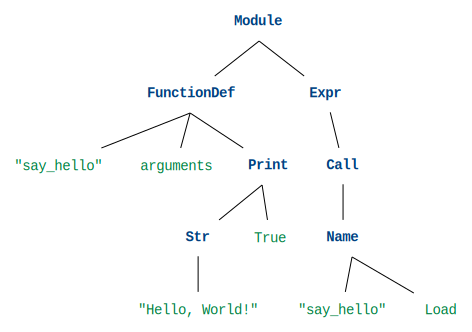

In [403]:
viz_code(program_code)

In [380]:
get_ast_rep(ast.parse(program), '', 'TREE', '')

['a', 'Name', 'Assign', 'LIST', ['Module', 'FunctionDef', 'arguments', 'Print', 'Str', 'Expr', 'Call', 'Name', 'Load', 'Module', 'Assign', 'Name']]
['int', 'Name', 'Call', 'AST', ['Module', 'FunctionDef', 'arguments', 'Print', 'Str', 'Expr', 'Call', 'Name', 'Load', 'Module', 'Assign', 'Name', 'Store', 'Call', 'Name']]
['raw_input', 'Name', 'Call', 'AST', ['Module', 'FunctionDef', 'arguments', 'Print', 'Str', 'Expr', 'Call', 'Name', 'Load', 'Module', 'Assign', 'Name', 'Store', 'Call', 'Name', 'Load', 'Call', 'Name']]
['Call', 'Call', 'LIST', ['Module', 'FunctionDef', 'arguments', 'Print', 'Str', 'Expr', 'Call', 'Name', 'Load', 'Module', 'Assign', 'Name', 'Store', 'Call', 'Name', 'Load', 'Call', 'Name', 'Load']]
['Call', 'Call', 'LIST', ['Module', 'FunctionDef', 'arguments', 'Print', 'Str', 'Expr', 'Call', 'Name', 'Load', 'Module', 'Assign', 'Name', 'Store', 'Call', 'Name', 'Load', 'Call', 'Name', 'Load']]
['Call', 'Assign', 'AST', ['Module', 'FunctionDef', 'arguments', 'Print', 'Str', '

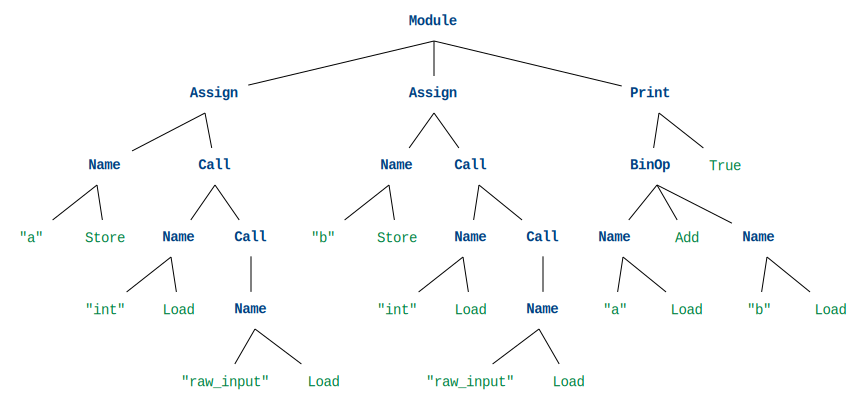

In [351]:
viz_code(program)

## Examples

In [47]:
program_a = '''
def get_name(name):
    print 'Hi %s' % (name)
    
get_name('David')
'''

In [48]:
program_sum = '''
#!/usr/bin/env python

# read from input
a = int(raw_input()) # first
b = int(raw_input()) # second

print a + b'''

In [49]:
program_score = '''
n = input()
i = 0
away_score = (away_goals * 3) + away_points
home_score = (home_goals * 3) + home_points 
while n < 4:
    n = input()
    if home_score > away_score :
        print "home win"
    elif home_score < away_score :
        print "away win"
    else:
        print "draw"
    i = i + 1
'''

In [50]:
program_codes = [
    program_a,
    program_sum,
    program_score
]

In [51]:
docs = [ remove_comments(p) for p in program_codes ]

In [52]:
t = Tokenizer(num_words=None, 
              filters='\t\n', 
              lower=True, 
              split=' ', 
              char_level=False)

In [53]:
t.fit_on_texts(docs)

In [54]:
t.word_counts

OrderedDict([('def', 1),
             ('get_name(name):', 1),
             ('print', 5),
             ("'hi", 1),
             ("%s'", 1),
             ('%', 1),
             ('(name)', 1),
             ("get_name('david')", 1),
             ('a', 2),
             ('=', 8),
             ('int(raw_input())', 2),
             ('b', 2),
             ('+', 4),
             ('n', 3),
             ('input()', 2),
             ('i', 3),
             ('0', 1),
             ('away_score', 3),
             ('(away_goals', 1),
             ('*', 2),
             ('3)', 2),
             ('away_points', 1),
             ('home_score', 3),
             ('(home_goals', 1),
             ('home_points', 1),
             ('while', 1),
             ('<', 2),
             ('4:', 1),
             ('if', 1),
             ('>', 1),
             (':', 2),
             ('"home', 1),
             ('win"', 2),
             ('elif', 1),
             ('"away', 1),
             ('else:', 1),
             ('"draw"',

In [55]:
t.texts_to_matrix(docs, mode='count')

array([[ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,  2.,  2.,  2.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  6.,  3.,  3.,  3.,  3.,  3.,  3.,  0.,  0.,  0.,  2.,  2.,
         2.,  2.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

In [56]:
t.texts_to_matrix(docs, mode='tfidf')

array([[ 0.        ,  0.        ,  0.55961579,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.91629073,  0.91629073,  0.91629073,
         0.91629073,  0.91629073,  0.91629073,  0.91629073,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.17360019,  0.55961579,  0.69314718,  0.        ,
         0.        ,  0.        ,  0.        ,  1.55141507,  1.55141507,
         1.55141507,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.

In [57]:
!python -m tokenize data/examples/sum.py

1,0-1,21:	COMMENT	'#!/usr/bin/env python'
1,21-1,22:	NL	'\n'
2,0-2,1:	NL	'\n'
3,0-3,17:	COMMENT	'# read from input'
3,17-3,18:	NL	'\n'
4,0-4,1:	NAME	'a'
4,2-4,3:	OP	'='
4,4-4,7:	NAME	'int'
4,7-4,8:	OP	'('
4,8-4,17:	NAME	'raw_input'
4,17-4,18:	OP	'('
4,18-4,19:	OP	')'
4,19-4,20:	OP	')'
4,21-4,28:	COMMENT	'# first'
4,28-4,29:	NEWLINE	'\n'
5,0-5,1:	NAME	'b'
5,2-5,3:	OP	'='
5,4-5,7:	NAME	'int'
5,7-5,8:	OP	'('
5,8-5,17:	NAME	'raw_input'
5,17-5,18:	OP	'('
5,18-5,19:	OP	')'
5,19-5,20:	OP	')'
5,21-5,29:	COMMENT	'# second'
5,29-5,30:	NEWLINE	'\n'
6,0-6,1:	NL	'\n'
7,0-7,5:	NAME	'print'
7,6-7,7:	NAME	'a'
7,8-7,9:	OP	'+'
7,10-7,11:	NAME	'b'
7,11-7,12:	NEWLINE	'\n'
8,0-8,0:	ENDMARKER	''


In [58]:
!cat data/examples/score.py

n = input()
i = 0
away_score = (away_goals * 3) + away_points
home_score = (home_goals * 3) + home_points 
while n < 4:
    n = input()
    if home_score > away_score :
        print "home win"
    elif home_score < away_score :
        print "away win"
    else:
        print "draw"
    i = i + 1


In [59]:
!python -m tokenize data/examples/score.py

1,0-1,1:	NAME	'n'
1,2-1,3:	OP	'='
1,4-1,9:	NAME	'input'
1,9-1,10:	OP	'('
1,10-1,11:	OP	')'
1,11-1,12:	NEWLINE	'\n'
2,0-2,1:	NAME	'i'
2,2-2,3:	OP	'='
2,4-2,5:	NUMBER	'0'
2,5-2,6:	NEWLINE	'\n'
3,0-3,10:	NAME	'away_score'
3,11-3,12:	OP	'='
3,13-3,14:	OP	'('
3,14-3,24:	NAME	'away_goals'
3,25-3,26:	OP	'*'
3,27-3,28:	NUMBER	'3'
3,28-3,29:	OP	')'
3,30-3,31:	OP	'+'
3,32-3,43:	NAME	'away_points'
3,43-3,44:	NEWLINE	'\n'
4,0-4,10:	NAME	'home_score'
4,11-4,12:	OP	'='
4,13-4,14:	OP	'('
4,14-4,24:	NAME	'home_goals'
4,25-4,26:	OP	'*'
4,27-4,28:	NUMBER	'3'
4,28-4,29:	OP	')'
4,30-4,31:	OP	'+'
4,32-4,43:	NAME	'home_points'
4,44-4,45:	NEWLINE	'\n'
5,0-5,5:	NAME	'while'
5,6-5,7:	NAME	'n'
5,8-5,9:	OP	'<'
5,10-5,11:	NUMBER	'4'
5,11-5,12:	OP	':'
5,12-5,13:	NEWLINE	'\n'
6,0-6,4:	INDENT	'    '
6,4-6,5:	NAME	'n'
6,6-6,7:	OP	'='
6,8-6,13:	NAME	'input'
6,13-6,14:	OP	'('
6,14-6,15:	OP	')'
6,15-6,16:	NEWLINE	'\n'
7,4-7,6:	NAME	'if'
7,7-7,17:	NAME	'home_score'
7,18-7,19:	OP	'>'
7,20-7,30:	NAME	'away_score'
7,31-7,32

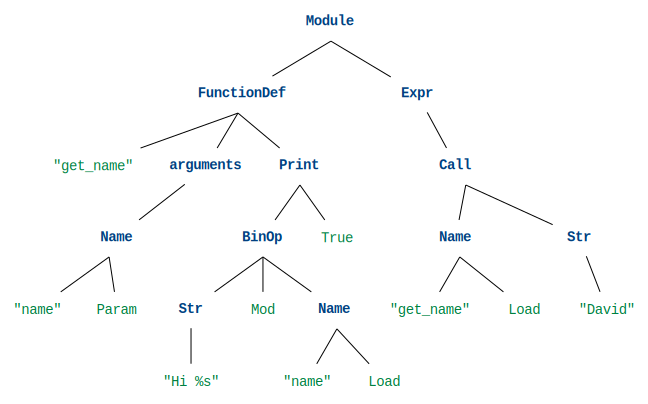

In [66]:
viz_code(program_a)

### Utils

In [60]:
# Run another notebook

# http://nbviewer.jupyter.org/gist/minrk/5491090/analysis.ipynb

#import io
#from IPython.nbformat import current

#def execute_notebook(nbfile):
#    with io.open(nbfile) as f:
#        nb = current.read(f, 'json')
#    ip = get_ipython()
#    for cell in nb.worksheets[0].cells:
#        if cell.cell_type != 'code':
#            continue
#        ip.run_cell(cell.input)

# execute_notebook("Tokenize Python programs.ipynb")

# Call the function defined on that notebook:
# get_tokens(program)